# Classification - Support Vector Machine

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score, accuracy_score

In [9]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [11]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [15]:
churn_df= df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless','churn']].copy()

In [17]:
churn_df['churn'] = churn_df['churn'].astype(int)

In [19]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [23]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless']].values
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [31]:
y = churn_df['churn'].values
y[0:5]

array([1, 1, 0, 0, 0])

In [33]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
print('Training Size:', X_train.shape, y_train.shape)
print('Testing Size:', X_test.shape, y_test.shape)

Training Size: (150, 9) (150,)
Testing Size: (50, 9) (50,)


In [124]:
# {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
SVM = SVC(kernel='linear').fit(X_train,y_train)

In [126]:
SVM

SVC(kernel='linear')

In [128]:
yhat = SVM.predict(X_test)
yhat[0:5]

array([0, 1, 0, 0, 0])

In [130]:
jaccard_score(y_test,yhat, pos_label=0)

0.7555555555555555

In [132]:
accuracy_score(y_test,yhat)

0.78

In [134]:
print(confusion_matrix(y_test,yhat, labels=[1,0]))

[[ 5  6]
 [ 5 34]]


In [136]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.50      0.45      0.48        11

    accuracy                           0.78        50
   macro avg       0.68      0.66      0.67        50
weighted avg       0.77      0.78      0.78        50



In [138]:
# Get the separating hyperplane
w = SVM.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = a * xx - (SVM.intercept_[0]) / w[1]

In [140]:
# Plot the decision boundary and margins
margin = 1 / np.sqrt(np.sum(w**2))
yy_margin1 = yy + np.sqrt(1 + a**2) * margin
yy_margin2 = yy - np.sqrt(1 + a**2) * margin

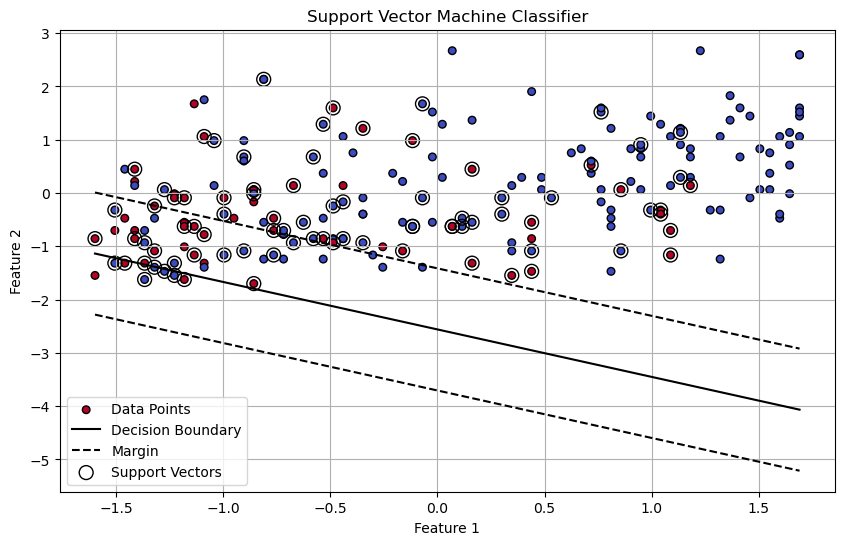

In [144]:
# Plotting the dataset and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k', label="Data Points")
plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.plot(xx, yy_margin1, 'k--', label="Margin")
plt.plot(xx, yy_margin2, 'k--')

# Highlight support vectors
plt.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label="Support Vectors")

plt.title("Support Vector Machine Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()